In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [32]:
df=pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [33]:
df=df.drop("Address",axis=1)
df.head()
X=df[["Age","Income"]]

In [34]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[ 0.74291541, -0.71845859],
       [ 1.48949049,  1.38432469],
       [-0.25251804,  0.26803233],
       ...,
       [-1.24795149, -0.74441888],
       [-0.37694723, -0.484816  ],
       [ 2.1116364 ,  0.44975434]])

In [35]:
k_means=KMeans(init="k-means++",n_clusters=4,n_init=12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [36]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.34665632, -0.17704681],
       [-0.95608928, -0.47540264],
       [ 1.28902126,  4.68560791],
       [ 1.30931058,  0.91569093]])

In [27]:
k_means_labels=k_means.labels_
k_means_labels

array([0, 3, 0, 2, 1, 3, 0, 3, 2, 3, 3, 0, 2, 0, 2, 2, 2, 0, 3, 0, 2, 0,
       2, 3, 3, 3, 2, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 2, 3, 2, 3, 2, 1,
       0, 3, 2, 2, 2, 2, 3, 0, 2, 3, 2, 0, 2, 2, 0, 3, 0, 0, 0, 3, 2, 2,
       0, 2, 0, 2, 2, 3, 0, 2, 2, 2, 0, 0, 3, 3, 0, 2, 3, 0, 3, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 2, 3, 0, 0, 2, 3, 0, 2, 0, 3,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 3, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 3, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 3, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       0, 2, 2, 3, 0, 0, 2, 3, 0, 2, 0, 0, 0, 3, 2, 0, 0, 0, 3, 0, 2, 3,
       1, 0, 3, 0, 2, 0, 0, 3, 0, 1, 3, 2, 2, 0, 0, 3, 0, 2, 0, 2, 0, 3,
       2, 3, 2, 2, 2, 2, 3, 2, 0, 3, 0, 0, 2, 2, 3, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 1, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       3, 3, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 3, 0,
       0, 2, 3, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 3, 3,

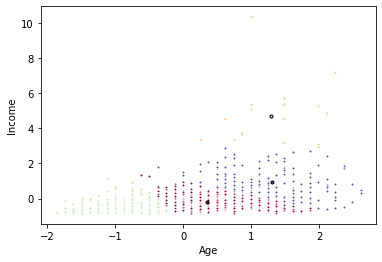

In [38]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
colors=plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
for k,col in zip(range(4),colors):
    my_members=(k==k_means_labels)
    cluster_centers=k_means_cluster_centers[k]
    ax.plot(X[my_members,0],X[my_members,1],'w', markerfacecolor=col, marker='.')
    
    ax.plot(cluster_centers[0],cluster_centers[1],'o',markerfacecolor=col,markeredgecolor='k',marker='.')
plt.ylabel("Income")
plt.xlabel("Age")
    
plt.show()    